# Required installation

In [54]:
%%capture 
pip install -r requirements.txt

In [55]:
import multiprocessing
print("The number of CPU cores:", multiprocessing.cpu_count())

The number of CPU cores: 8


# Booking scraping

Importing all the functions from the Python file in folder:

In [56]:
from web_scraping.booking1 import *


The URL link on Booking.com obtained from searching for a common location, area, or country:

In [57]:
url_test ='https://www.booking.com/searchresults.html?ss=Ha+Giang%2C+Vietnam&label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&lang=en-us&sb=1&src_elem=sb&src=index&dest_id=6906&dest_type=region&ac_position=1&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=b48710f70163005c&ac_meta=GhBiNDg3MTBmNzAxNjMwMDVjIAEoATICZW46CEhBIGdpYW5nQABKAFAA&checkin=2023-08-26&checkout=2023-08-27&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure'

## Crawling hotel and review information from URL link

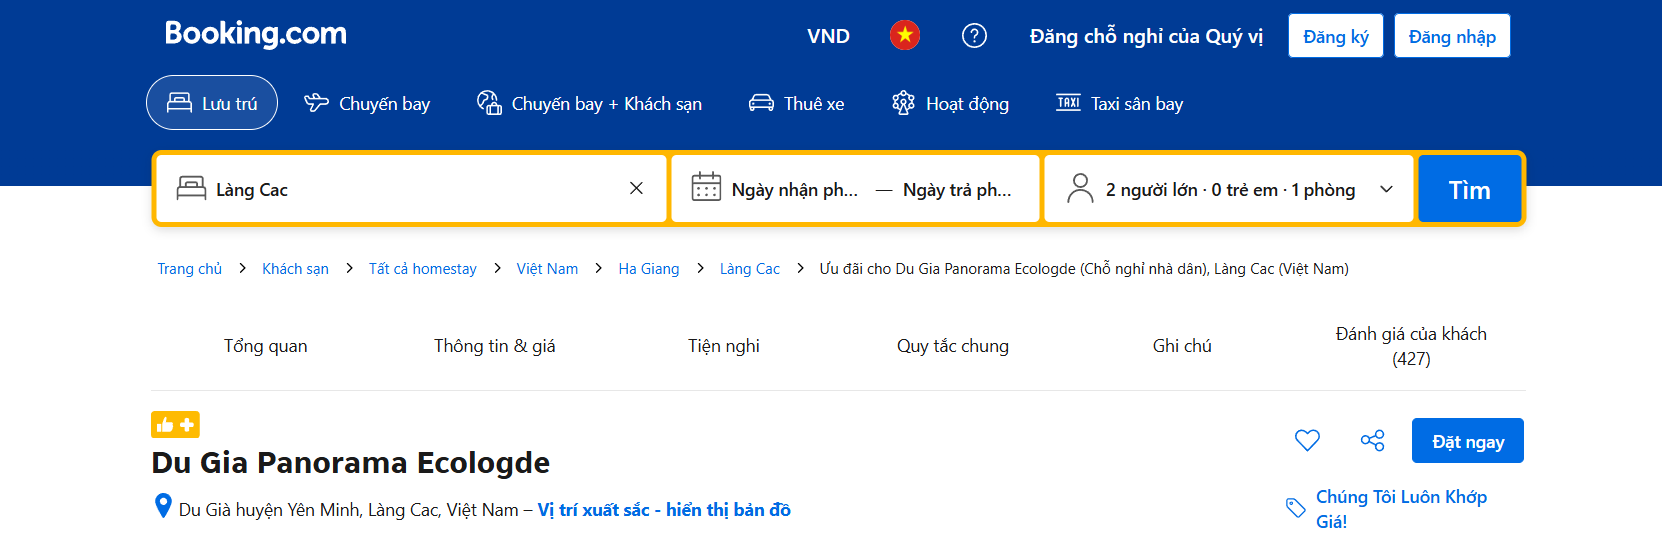

Using the function ``crawling_from_booking_optional()`` with the parameter ``max_hotels`` to crawl the desired amount of information.

In [83]:
%%time
# data = crawling_from_booking(url_test)
data = crawling_from_booking_optional(url_test,max_hotels=3)
# data

d:\Manhos_work\myenv\Lib\site-packages\seleniumwire\thirdparty\mitmproxy\server\protocol\http2.py:382: RuntimeWarning: coroutine 'AddonManager.handle_lifecycle' was never awaited
  self._kill_all_streams()


Total properties collected: 3
Property 1: https://www.booking.com/hotel/vn/ha-giang-loop-hostel-ha-giang1.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&ucfs=1&arphpl=1&checkin=2023-08-26&checkout=2023-08-27&dest_id=6906&dest_type=region&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=7d203d44be6f0541&srepoch=1743583369&from=searchresults
Property 2: https://www.booking.com/hotel/vn/du-gia-panorama.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&ucfs=1&arphpl=1&checkin=2023-08-26&checkout=2023-08-27&dest_id=6906&dest_type=region&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=2&hapos=2&sr_order=popularity&srpvid=7d203d44be6f0541&srepoch=1743583369&from=searchresults

100%|██████████| 3/3 [00:07<00:00,  2.58s/it]


Total hotels collected: 3
Property 1 has 0 reviews
Property 2 has 475 reviews
Property 3 has 159 reviews
CPU times: total: 13.7 s
Wall time: 10min 50s


In [84]:
data['hotels'][0]

{'link': 'https://www.booking.com/hotel/vn/ha-giang-loop-hostel-ha-giang1.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&ucfs=1&arphpl=1&checkin=2023-08-26&checkout=2023-08-27&dest_id=6906&dest_type=region&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=7d203d44be6f0541&srepoch=1743583369&from=searchresults',
 'name': 'Ha Giang Loop Hostel & Tours',
 'address': 'số 29 ngõ 30 đường Ba Tháng Hai phường Quang Trung, thành phố Hà Giang, tỉnh Hà Giang, Ha Giang, Vietnam',
 'content': "You might be eligible for a Genius discount at Ha Giang Loop Hostel & Tours. To check if a Genius discount is available for your selected dates sign in.\n\n\nGenius discounts at this property are subject to book dates, stay dates and other available deals.\n\nHa Giang Loop Hostel & Tours has free bikes, outdoor swimming pool, a gar

In [85]:
print(f'Total reviews: {len(data['reviews'][0])}')
data['reviews'][0] # the reviews of the first hotel

Total reviews: 0


[]

Extracting hotel information into a specific DataFrame:

In [86]:
df_hotels = pd.DataFrame.from_dict(data['hotels'])
df_hotels

,link,name,address,content,review_score,review_count,star_rating,most_facility,all_facilities,sub_score,rooms,rooms_type
0,https://www.booking.com/hotel/vn/ha-giang-loop...,Ha Giang Loop Hostel & Tours,số 29 ngõ 30 đường Ba Tháng Hai phường Quang T...,You might be eligible for a Genius discount at...,Scored 8.9 8.9,971 reviews,None,"['Outdoor swimming pool', 'Free WiFi', 'Free p...","[{'key': 'Most popular facilities', 'value': [...","[{'aspect': 'Staff ', 'value': ['9.4']}, {'asp...",[],[]
1,https://www.booking.com/hotel/vn/du-gia-panora...,Du Gia Panorama Ecologde,"Du Già huyện Yên Minh, Làng Cac, Vietnam",You might be eligible for a Genius discount at...,Scored 9.4 9.4,475 reviews,None,"['Non-smoking rooms', 'Free parking', 'Fast fr...","[{'key': 'Most popular facilities', 'value': [...","[{'aspect': 'Staff ', 'value': ['9.6']}, {'asp...",[],[]
2,https://www.booking.com/hotel/vn/ha-giang-xanh...,"Ha Giang Xanh Retreat - Trekking, Tour, Motorb...","Nguyễn Văn Linh, Ha Giang, Vietnam",You might be eligible for a Genius discount at...,Scored 9.2 9.2,158 reviews,None,"['Outdoor swimming pool', 'Fast free WiFi (81 ...","[{'key': 'Most popular facilities', 'value': [...","[{'aspect': 'Staff ', 'value': ['9.5']}, {'asp...",[],[]


Note that the data for ``star_rating``, ``rooms``, and ``rooms_type`` is obtained from Booking.com and the hotels. Some hotels have a star rating available, but in some cases, you may need to sign in or select a specific time period to access this information. Therefore, missing (None) data is expected.

Using ``.to_csv()`` to export any DataFrame:

In [62]:
# df_hotels.to_csv('hotels.csv', index=False, encoding='utf-8')

Extracting all the information from crawling into a DataFrame:

In [87]:
pd.DataFrame.from_dict(data)

,hotels,reviews
0,{'link': 'https://www.booking.com/hotel/vn/ha-...,[]
1,{'link': 'https://www.booking.com/hotel/vn/du-...,"[{'date': 'Reviewed: February 8, 2024', 'title..."
2,{'link': 'https://www.booking.com/hotel/vn/ha-...,"[{'date': 'Reviewed: March 22, 2025', 'title':..."


In [64]:
# pd.DataFrame.from_dict(data['reviews'][2])

Extracting review information into a specific DataFrame:

In [88]:
from itertools import chain

# Flatten the list of reviews
all_reviews = list(chain.from_iterable(data['reviews']))

# Convert the flattened list to a DataFrame
df_reviews = pd.DataFrame.from_dict(all_reviews)

print(df_reviews.shape)
df_reviews.head(5)

(634, 8)


,date,title,content,score,user,country,url,id_url
0,"Reviewed: February 8, 2024",Exceptional,"Amazing location, beautiful view from the bung...",Scored 10 10,Marta,Vietnam,https://www.booking.com/hotel/vn/du-gia-panora...,du-gia-panorama.html
1,"Reviewed: March 24, 2025","Ideal stay, not too busy and slightly more mat...","Everything wast perfect - private bathroom, ex...",Scored 10 10,Harry,United Kingdom,https://www.booking.com/hotel/vn/du-gia-panora...,du-gia-panorama.html
2,"Reviewed: March 24, 2025","Drop Your Bags, You're Here Now","It's a bit hard to find, but damn worthwhile. ...",Scored 10 10,Hung,United States,https://www.booking.com/hotel/vn/du-gia-panora...,du-gia-panorama.html
3,"Reviewed: March 18, 2025",Exceptional,"Friendly host, wonderful views, also enjoyed t...",Scored 10 10,Doris,Malaysia,https://www.booking.com/hotel/vn/du-gia-panora...,du-gia-panorama.html
4,"Reviewed: March 15, 2025",Exceptional,"Amazing views, comfy bed with a big mosquito n...",Scored 10 10,Seann,United Kingdom,https://www.booking.com/hotel/vn/du-gia-panora...,du-gia-panorama.html


Instead of specifying a value for ``max_hotels``, we can set it to ``None``, which means the function will automatically crawl all available hotels. However, the maximum number of hotels crawled can reach 25. To detect this limitation, you can use the function ``crawling_from_booking_all``.

In [66]:
# %%time
# data_25 = crawling_from_booking_optional(url_test,max_hotels=None)
# pd.DataFrame.from_dict(data_25)

## Crawling big data

Using the function ``crawling_from_booking_all``.

In [67]:
test_url = "https://www.booking.com/searchresults.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&ss=Ha+Giang%2C+Vietnam&lang=en-us&src=index&dest_id=6906&dest_type=region&ac_position=1&ac_click_type=b&ac_langcode=en&ac_suggestion_list_length=5&search_selected=true&search_pageview_id=b48710f70163005c&checkin=2023-08-26&checkout=2023-08-27&group_adults=2&no_rooms=1&group_children=0&sb_travel_purpose=leisure&nflt=class%3D4%3Bclass%3D3"

In [68]:
%%time
df_all = crawling_from_booking_all(test_url)
# df_all

Finished scrolling. Now clicking 'Load more results' button...
No more 'Load more results' button found. Total clicks: 0
Total properties collected: 45
Property 1: https://www.booking.com/hotel/vn/ha-giang-xanh-homestay.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&ucfs=1&arphpl=1&checkin=2023-08-26&checkout=2023-08-27&dest_id=6906&dest_type=region&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&nflt=class%3D4%3Bclass%3D3&srpvid=d5b239b3bb7e0440&srepoch=1743581558&from=searchresults
Property 2: https://www.booking.com/hotel/vn/sun-ha-giang.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&ucfs=1&arphpl=1&checkin=2023-08-26&checkout=2023-08-27&dest_id=6906&dest_type=region&group_adults=2&req_adults=2&n

100%|██████████| 45/45 [01:46<00:00,  2.38s/it]


Total hotels collected: 45
Property 1 has 159 reviews
Property 2 has 0 reviews
Property 3 has 0 reviews
Property 4 has 0 reviews
Property 5 has 0 reviews
Property 6 has 175 reviews
Property 7 has 0 reviews
Property 8 has 0 reviews
Property 9 has 8 reviews
Property 10 has 0 reviews
Property 11 has 466 reviews
Property 12 has 34 reviews
Property 13 has 0 reviews
Property 14 has 130 reviews
Property 15 has 0 reviews
Property 16 has 71 reviews
Property 17 has 280 reviews
Property 18 has 0 reviews
Property 19 has 0 reviews
Property 20 has 67 reviews
Property 21 has 0 reviews
Property 22 has 77 reviews
Property 23 has 112 reviews
Property 24 has 28 reviews
Property 25 has 144 reviews
Property 26 has 29 reviews
Property 27 has 359 reviews
Property 28 has 0 reviews
Property 29 has 0 reviews
Property 30 has 0 reviews
Property 31 has 161 reviews
Property 32 has 0 reviews
Property 33 has 0 reviews
Property 34 has 103 reviews
Property 35 has 0 reviews
Property 36 has 0 reviews
Property 37 has 2 re

In [69]:
pd.DataFrame.from_dict(df_all)

,hotels,reviews
0,{'link': 'https://www.booking.com/hotel/vn/ha-...,"[{'date': 'Reviewed: March 22, 2025', 'title':..."
1,{'link': 'https://www.booking.com/hotel/vn/sun...,[]
2,{'link': 'https://www.booking.com/hotel/vn/sil...,[]
3,{'link': 'https://www.booking.com/hotel/vn/pin...,[]
4,{'link': 'https://www.booking.com/hotel/vn/sky...,[]
5,{'link': 'https://www.booking.com/hotel/vn/to-...,"[{'date': 'Reviewed: February 10, 2024', 'titl..."
6,{'link': 'https://www.booking.com/hotel/vn/loc...,[]
7,{'link': 'https://www.booking.com/hotel/vn/pho...,[]
8,{'link': 'https://www.booking.com/hotel/vn/kha...,"[{'date': 'Reviewed: March 28, 2025', 'title':..."
9,{'link': 'https://www.booking.com/hotel/vn/29-...,[]


In [70]:
# df_all.to_csv('hotels_all.csv', index=False, encoding='utf-8')

In [71]:
count = len(df_all['hotels'])  # Khai báo count trước vòng lặp

for i in range(len(df_all['hotels'])):
    review_count = int(df_all['hotels'][i]['review_count'].split()[0])  # Chuyển về số
    review_crawled = len(df_all['reviews'][i])

    # print(f"Hotel {i+1}:")
    # print(f"Name: {df_all['hotels'][i]['name']}")
    # print(f"Review count: {review_count}")
    # print(f"Review crawled: {review_crawled}")

    if review_count != 0 and review_crawled == 0:
        count -= 1  # Trừ đi nếu khách sạn có review nhưng không crawl được

print(f"Total hotels have crawled reviews: {count}")


Total hotels have crawled reviews: 23


Remark: There are 23 out of 45 hotels that have crawled reviews.

Note that we cannot guarantee crawling all data for each hotel. Sometimes, Booking.com may block crawling requests. Since Booking.com has a closed API, we must accept this limitation and comply with their terms of use when collecting data.

## Booking extracting reviews:

Besides, you can use the function ``extract_reviews()`` to extract reviews from specific hotel.

In [72]:
reviews_url_test = df_all['hotels'][0]['link']

In [73]:
reviews = extract_reviews(reviews_url_test)

Extracting reviews for: https://www.booking.com/hotel/vn/ha-giang-xanh-homestay.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&ucfs=1&arphpl=1&checkin=2023-08-26&checkout=2023-08-27&dest_id=6906&dest_type=region&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&nflt=class%3D4%3Bclass%3D3&srpvid=d5b239b3bb7e0440&srepoch=1743581558&from=searchresults


In [74]:
pd.DataFrame.from_dict(reviews).head(3)

,date,title,content,score,user,country,url,id_url
0,"Reviewed: March 22, 2025",Clean and beautiful hotel with incredibly kind...,This hotel in Hà Giang was beautiful and spotl...,Scored 10 10,Alexandre,Sweden,https://www.booking.com/hotel/vn/ha-giang-xanh...,ha-giang-xanh-homestay.html
1,"Reviewed: March 30, 2025",Wonderful,"Long and the rest of the staff were fantastic,...",Scored 9.0 9.0,George,United Kingdom,https://www.booking.com/hotel/vn/ha-giang-xanh...,ha-giang-xanh-homestay.html
2,"Reviewed: March 30, 2025",Exceptional,Amazing experience ! Very helpful staff that h...,Scored 10 10,Lorène,Canada,https://www.booking.com/hotel/vn/ha-giang-xanh...,ha-giang-xanh-homestay.html


In [75]:
# reviews.to_csv('reviews.csv', index=False, encoding='utf-8')

## Extract_hotel_links

The function ``extract_hotel_links()`` extracts links to the specific hotels.

In [76]:
# Initialize processed_links as an empty list (or provide the appropriate value if required)
processed_links = []

# Call the function with the required arguments
df_hotel_link = extract_hotel_links(url_test, processed_links)

In [77]:
# df_hotel_link[0]
pd.DataFrame.from_dict(df_hotel_link[0]).head(3)

,link,hotel_name,overall_rating,type_rating,price,address,image
0,https://www.booking.com/hotel/vn/ha-giang-loop...,Ha Giang Loop Hostel & Tours,Scored 8.9 8.9,Excellent,NaN,Ha Giang,https://cf.bstatic.com/xdata/images/hotel/squa...
1,https://www.booking.com/hotel/vn/du-gia-panora...,Du Gia Panorama Ecologde,Scored 9.4 9.4,Wonderful,NaN,Làng Cac,https://cf.bstatic.com/xdata/images/hotel/squa...
2,https://www.booking.com/hotel/vn/ha-giang-xanh...,"Ha Giang Xanh Retreat - Trekking, Tour, Motorb...",Scored 9.2 9.2,Wonderful,NaN,Ha Giang,https://cf.bstatic.com/xdata/images/hotel/squa...


In [78]:
df_hotel_link[0][0]

{'link': 'https://www.booking.com/hotel/vn/ha-giang-loop-hostel-ha-giang1.html?label=gen173nr-1FCAEoggI46AdIM1gEaPQBiAEBmAExuAEHyAEM2AEB6AEB-AECiAIBqAIDuALvifamBsACAdICJDJkZGI2YmM2LTMxMzQtNGM1Yi04MWNjLWI2NTVkMDM0NWQ0OdgCBeACAQ&aid=304142&ucfs=1&arphpl=1&checkin=2023-08-26&checkout=2023-08-27&dest_id=6906&dest_type=region&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=1&hapos=1&sr_order=popularity&srpvid=27a33ced3d4104bf&srepoch=1743583195&from=searchresults',
 'hotel_name': 'Ha Giang Loop Hostel & Tours',
 'overall_rating': 'Scored 8.9 8.9',
 'type_rating': 'Excellent',
 'price': nan,
 'address': 'Ha Giang',
 'image': 'https://cf.bstatic.com/xdata/images/hotel/square240/359776825.jpg?k=1113689cee1057a2c52edeed52a42b601bee6cf62de27aef37ea882c2556b263&o='}

## Extract_hotel_properties

The function ``extract_hotel_properties()`` extracts some basic information of a hotel such as name, address, facilities, review score, ...

In [79]:
# Iterate over the list of URLs and extract properties for each hotel
df_hotel_properties = [extract_hotel_properties(url) for url in df_hotel_link[1]]

In [80]:
# df_hotel_properties

In [81]:
pd.DataFrame.from_dict(df_hotel_properties).head(5)

,link,name,address,content,review_score,review_count,star_rating,most_facility,all_facilities,sub_score,rooms,rooms_type
0,https://www.booking.com/hotel/vn/ha-giang-loop...,Ha Giang Loop Hostel & Tours,số 29 ngõ 30 đường Ba Tháng Hai phường Quang T...,You might be eligible for a Genius discount at...,Scored 8.9 8.9,971 reviews,NaN,"['Outdoor swimming pool', 'Free WiFi', 'Free p...","[{'key': 'Bathroom', 'value': ['Toilet paper',...","[{'aspect': 'Staff ', 'value': ['9.4']}, {'asp...",[],[]
1,https://www.booking.com/hotel/vn/du-gia-panora...,Du Gia Panorama Ecologde,"Du Già huyện Yên Minh, Làng Cac, Vietnam",You might be eligible for a Genius discount at...,Scored 9.4 9.4,475 reviews,NaN,"['Non-smoking rooms', 'Free parking', 'Fast fr...","[{'key': 'Bathroom', 'value': ['Towels', 'Slip...","[{'aspect': 'Staff ', 'value': ['9.6']}, {'asp...",[],[]
2,https://www.booking.com/hotel/vn/ha-giang-xanh...,"Ha Giang Xanh Retreat - Trekking, Tour, Motorb...","Nguyễn Văn Linh, Ha Giang, Vietnam",You might be eligible for a Genius discount at...,Scored 9.2 9.2,158 reviews,NaN,"['Outdoor swimming pool', 'Fast free WiFi (81 ...","[{'key': 'Most popular facilities', 'value': [...","[{'aspect': 'Staff ', 'value': ['9.5']}, {'asp...",[],[]
3,https://www.booking.com/hotel/vn/ans-apartment...,An Home Ha Giang,"Đại Lộ Hữu Nghị QL2, Thôn Lúp, xã Phương Độ,, ...",You might be eligible for a Genius discount at...,Scored 9.6 9.6,31 reviews,NaN,"['Free WiFi', 'Free parking', 'Non-smoking roo...","[{'key': 'Most popular facilities', 'value': [...","[{'aspect': 'Staff ', 'value': ['9.8']}, {'asp...",[],[]
4,https://www.booking.com/hotel/vn/sun-ha-giang....,Sun Hà Giang Hotel-tours-motorbike rental,Đường chưa đặt tên 31 Nguyễn văn cừ Minh Khai...,You might be eligible for a Genius discount at...,Scored 8.8 8.8,388 reviews,3.0,"['Free WiFi', 'Free parking', 'Non-smoking roo...","[{'key': 'Bathroom', 'value': ['Toilet paper',...","[{'aspect': 'Staff ', 'value': ['9.6']}, {'asp...",[],[]


In [82]:
# df_hotel_properties.to_csv('hotel_properties.csv', index=False, encoding='utf-8')